# Cleaning Data with Pandas Exercises

For the exercises, you will be cleaning data in the Women's Clothing E-Commerce Reviews dataset.

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [33]:
# Import pandas and any other libraries you need here.
import pandas as pd
import matplotlib.pyplot as plt

# Create a new dataframe from your CSV
df = pd.read_csv(r'C:\Users\chris\Downloads\archive (1)\Womens Clothing E-Commerce Reviews.csv')

In [29]:
# Print out any information you need to understand your dataframe
# df.head()
print(df.columns)
# df.describe()
df2 = df.set_index('Unnamed: 0')
df2.head()
df2: pd.DataFrame = df2

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')


## Missing Data

Try out different methods to locate and resolve missing data.

In [8]:
# Try to find some missing data!
null_counts = df2.isnull().sum()
print(null_counts)

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


Did you find any missing data? What things worked well for you and what did not?

In [ ]:
# Respond to the above questions here:
# Yes. Chaining sum and is_null worked fantastically for me. That was the first thing I tried.

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers.

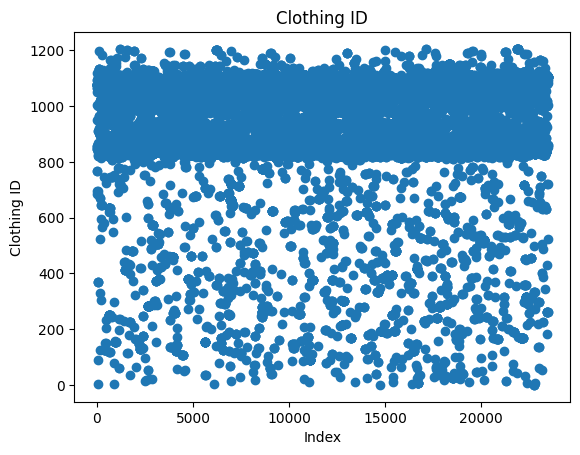

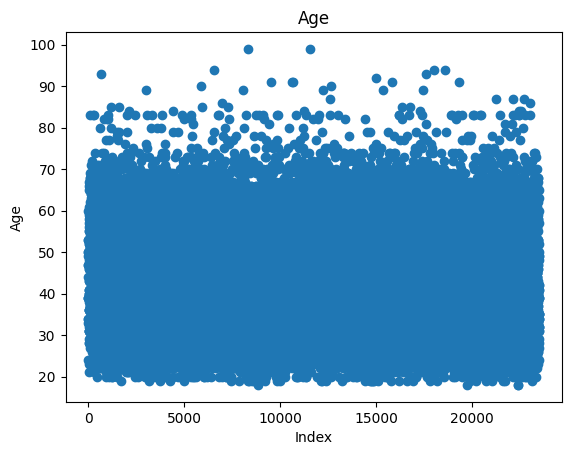

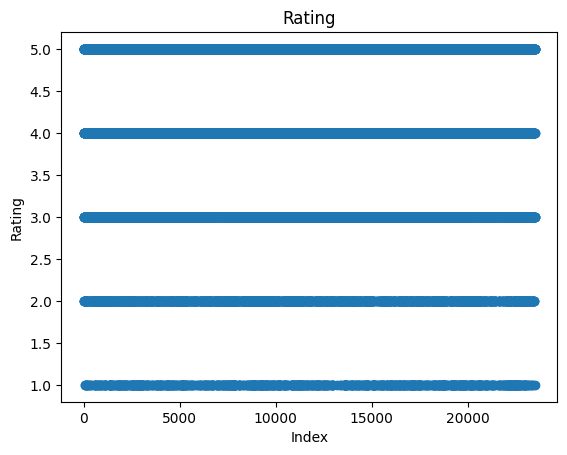

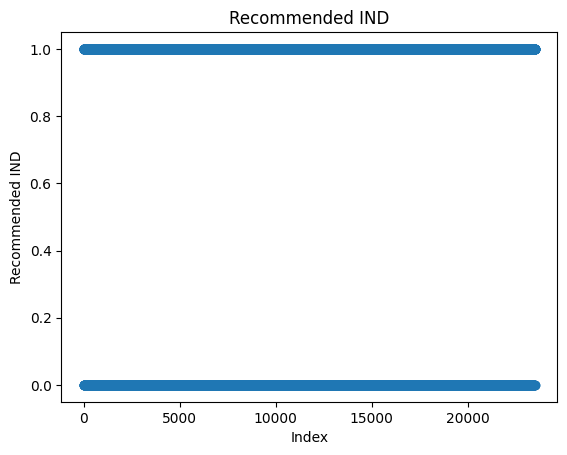

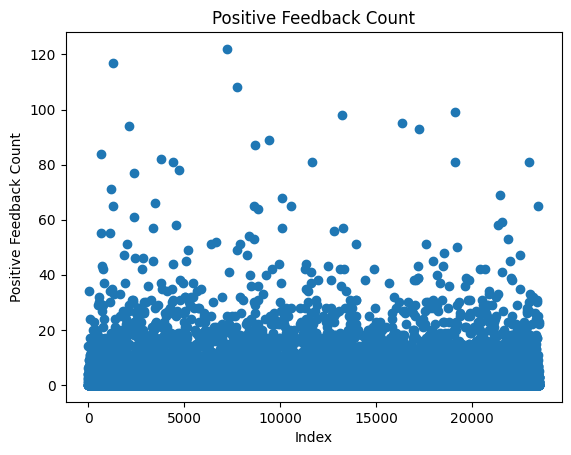

In [34]:
# Keep an eye out for outliers!
# for column in df2.select_dtypes(include='number').columns:
#     df2.plot.hist(column=column)

# for column in df2.select_dtypes(include='number').columns:
#     df2.boxplot(column=column)

for column in df2.select_dtypes(include='number').columns:
    plt.scatter(df2.index, df2[column])
    plt.title(column)
    plt.xlabel("Index")
    plt.ylabel(column)
    plt.show()

What techniques helped you find outliers? In your opinion, what about the techniques you used made them effective?

In [ ]:
# Make your notes here: I liked a scatterplot approach bc the lines on a histogram were too thin to recognize outliers. In the future I'd use IQR or Z-score depending on the distribution.

## Unnecessary Data

Unnecessary data could be irrelevant to your analysis or a duplice column. Check out the dataset to see if there is any unnecessary data.

In [38]:
# Look out for unnecessary data!
# df2.columns
df2.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
Unnamed: 0,,,,,,,,,,
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


Did you find any unnecessary data in your dataset? How did you handle it?

In [ ]:
# Make your notes here. Unnamed: 0 was pretty useless but I used it to replace the index.
# We probably only need one of these, depending on our goals: division name, dept name, class name.

## Inconsistent Data

Inconsistent data is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [43]:
# Look out for inconsistent data!
print(df2.dtypes)
all_numeric_strings_present = df2['Title'].astype(str).str.isnumeric().any()
all_numeric_strings_present1 = df2['Review Text'].astype(str).str.isnumeric().any()
all_numeric_strings_present2 = df2['Division Name'].astype(str).str.isnumeric().any()
all_numeric_strings_present3 = df2['Department Name'].astype(str).str.isnumeric().any()
all_numeric_strings_present4 = df2['Class Name'].astype(str).str.isnumeric().any()

print(f"Title contains entirely numeric strings: {all_numeric_strings_present}")
print(f"Review text contains entirely numeric strings: {all_numeric_strings_present}")
print(f"Division name contains entirely numeric strings: {all_numeric_strings_present}")
print(f"Dept name contains entirely numeric strings: {all_numeric_strings_present}")
print(f"Class name contains entirely numeric strings: {all_numeric_strings_present}")

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object
Title contains entirely numeric strings: False
Review text contains entirely numeric strings: False
Division name contains entirely numeric strings: False
Dept name contains entirely numeric strings: False
Class name contains entirely numeric strings: False


Did you find any inconsistent data? What did you do to clean it?

In [ ]:
# Make your notes here!
# I just left the data types alone considering the general purpose data type "object" seemed to suit our purposes just fine. We could probably convert division name, dept name, and class name to string but I don't see any upside to doing that without understanding what our goals are. There were no entirely numeric values in the object field, further validating this approach.